In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.metrics import r2_score
import sys
# %matplotlib qt

(51, 2)


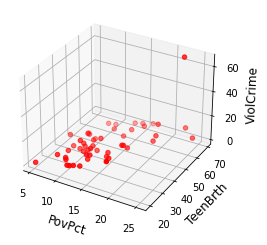

In [2]:
df = pd.read_csv('poverty.csv')
X = df[['PovPct','TeenBrth']]
X = X.to_numpy()
y = df['ViolCrime']
y = y.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('PovPct',fontsize=12)
ax.set_ylabel('TeenBrth',fontsize=12)
ax.set_zlabel('ViolCrime',fontsize=12)
print(X.shape)

(398, 2)


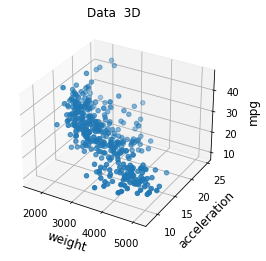

In [3]:
dataset = pd.read_csv('auto-mpg.csv')
vary=0
varx=[4,5]

X = dataset.iloc[:, varx].values #Feature matrix
y = dataset.iloc[:, vary].values #Criterion Matrix 
print(X.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(X[:,0],X[:,1],y)
plt.title("Data  3D ")
ax.set_xlabel(dataset.columns[varx[0]], fontsize=12);
ax.set_ylabel(dataset.columns[varx[1]], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);

0.6982595061132919


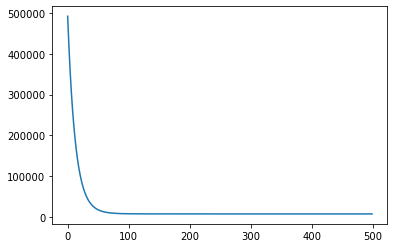

DG:  
 theta_0=23.514573 
 theta_1=-6.204380, 
 theta_2=0.690744


In [4]:
x_b = np.c_[np.ones((len(X),1)),X]
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std
    
N=len(y)
theta = np.array([[-10],[-10],[-10]])
ep=1e-4
lr =1e-4
n_iter = 500
j_cost_GD= np.zeros([n_iter])
y=y.reshape((len(y), 1))

for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    h=(pred - y)
    si=-lr*(x_bs.T.dot(h))
    theta = theta + si;
    j_cost_GD[it]=np.sum(np.square(h))

print(r2_score(y, pred))
pred = np.dot(x_bs,theta)
# print(np.c_[pred,y])  
fig = plt.figure()
plt.plot(j_cost_GD)
plt.show()
# print(np.c_[pred,y,h])
# print("Iterations: %d" %it)
print("DG:  \n theta_0=%f \n theta_1=%f, \n theta_2=%f" %(theta[0],theta[1],theta[2]))   

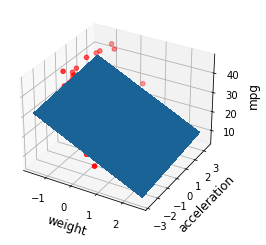

In [5]:
# %matplotlib qt
xc = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.01)
yc = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc)])
B, M = np.meshgrid(xc, yc, indexing = 'ij')

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j]=np.dot(np.c_[1,xc[i],yc[j]],theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel(dataset.columns[varx[0]], fontsize=12);
ax.set_ylabel(dataset.columns[varx[1]], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);

0.6941749987403174
DG:  
 theta_0=23.514573 
 theta_1=-6.204380, 
 theta_2=0.690744
SDG:  
 theta_0=23.284641 
 theta_1=-6.620186, 
 theta_2=0.286501


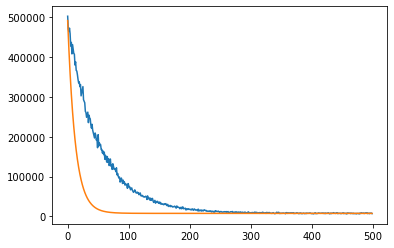

In [9]:
### Stochastic Gradient Descent
m = len(y)
lr =0.01
n_iter = 500
# theta = np.random.randn(3,1)
theta_SGD = np.array([[-10],[-10],[-10]])
j_cost_SGD= np.zeros([n_iter])
for it in range(n_iter):
    cost =0.0
    for i in range(m):
        rand_ind = np.random.randint(0,m)
        X_i = x_bs[rand_ind,:].reshape(1,x_bs.shape[1])
        y_i = y[rand_ind].reshape(1,1)
        pred = np.dot(X_i,theta_SGD)
        h=pred - y_i
        theta_SGD = theta_SGD -(1/m)*lr*( X_i.T.dot((h)))
        cost +=np.sum(np.square(h))
    j_cost_SGD[it]=cost
pred = np.dot(x_bs,theta_SGD)
print(r2_score(y, pred))
print("DG:  \n theta_0=%f \n theta_1=%f, \n theta_2=%f" %(theta[0],theta[1],theta[2]))   
print("SDG:  \n theta_0=%f \n theta_1=%f, \n theta_2=%f" %(theta_SGD[0],theta_SGD[1],theta_SGD[2]))   
# print(np.c_[pred,y])  
fig = plt.figure()
plt.plot(j_cost_SGD)
plt.plot(j_cost_GD)
plt.show()


In [18]:
%matplotlib qt
plane=np.zeros([len(yc),len(xc)])
B, M = np.meshgrid(xc, yc)

for i in range(len(xc)):
    for j in range(len(yc)):
        plane[j,i]=np.dot(np.c_[1,xc[i],yc[j]],theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane,
                       linewidth=0, antialiased=False)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel('alcohol',fontsize=12)
ax.set_ylabel('citric acid',fontsize=12)
ax.set_zlabel('chlorides',fontsize=12)

Text(0.5, 0, 'chlorides')